LAB 1: EXPLORING TABLE DATA

-TEAM:
- EMMANUEL NWORIE, 48666363
- PHILEMON AKUBUEZE, 49261257
- KENULE NWIGBO, 49258046

TELCO CUSTOMER CHURN
url - https://www.kaggle.com/datasets/blastchar/telco-customer-churn
(Focused customer retention programs)

## BUSINESS UNDERSTANDING
## 1. Overview of the Dataset
We got our dataset from Kaggle (https://www.kaggle.com/datasets/blastchar/telco-customer-churn) and the overview is as follows:

The Telco Customer Churn dataset tells a customer-level snapshot of a telecommunications service provider.
Each row represents an individual customer, with various features capturing demographic characteristics, subscribed services, billing information, and contractual attributes.
IBM developed this dataset as a support for research and applied analytics on customer churn, which is a major challenge in subscription-based industries.


## 2. Purpose of the Dataset (Why and How It Was Collected)
Customer churn represents a significant challenge in the telecommunications industry due to intense market competition and relatively low switching costs, which enable customers to change providers with minimal constraints. Because retaining existing customers is generally more cost-effective than acquiring new ones, reducing churn is a strategic priority for telecom firms.

Organizations therefore rely on historical customer data—captured through routine operational processes—to identify behavioral, contractual, and service-related patterns associated with customer attrition. The primary purpose of this dataset is to support exploratory analysis and predictive modeling aimed at understanding the determinants of churn and informing data-driven retention strategies.

## 3. Prediction Task
The central prediction task associated with this dataset is a binary classification problem. The objective is to predict whether a customer will churn (Yes) or remain with the company (No) in a future period, based on their demographic attributes, subscribed services, and billing and contractual information.

## 4. Third-Party and Their Interest
The prediction results are valuable to multiple stakeholders within the organization:

Marketing and Retention Teams: to target high-risk customers with personalized retention offers.

Customer Support Departments: to prioritize outreach efforts toward vulnerable accounts.

Business Strategists and Product Managers: to evaluate how pricing structures, contract types, and service bundles influence customer retention.

Finance Departments: to improve revenue forecasting and customer lifetime value (CLV) estimation.

By identifying customers who are most likely to churn, the organization can allocate resources more effectively and implement proactive intervention strategies.

## 5. Required Model Performance for Practical Usefulness
For these stakeholders, model usefulness is not determined solely by overall accuracy. Instead, the model must demonstrate strong discriminatory and ranking performance. Specifically, it should substantially outperform naïve baselines—such as assigning all customers the average churn probability.

In practical terms, a churn prediction model would be considered operationally valuable if it achieves:

A ROC–AUC of approximately 0.80 or higher, indicating strong separation between churners and non-churners; and

Meaningful lift, such as identifying a top 10–20% high-risk customer segment in which the churn rate is two to four times higher than the overall population average.

Achieving this level of performance would make the model economically justifiable, enabling the company to focus retention efforts on customers with significantly elevated churn risk and thereby improve long-term revenue sustainability.

DATA UNDERSTANDING

In [439]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")


file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
full_file_path = os.path.join(path, file_name)
df = pd.read_csv(full_file_path)

df.head()



Using Colab cache for faster access to the 'telco-customer-churn' dataset.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [440]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [441]:
print(df.columns.tolist())


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [442]:
df.iloc[488]

,488
customerID,4472-LVYGI
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,0
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,Yes


In [443]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [444]:
# The attribute overview table is given below
attribute_overview = pd.DataFrame({
    "Feature": df.columns,
    "Description": [
        "Unique customer identifier",
        "Customer gender (Male/Female)",
        "Whether the customer is a senior citizen",
        "Whether the customer has a partner",
        "Whether the customer has dependents",
        "Number of months the customer has stayed with the company",
        "Whether phone service is subscribed",
        "Whether multiple phone lines are subscribed",
        "Type of internet service subscribed",
        "Whether online security service is subscribed",
        "Whether online backup service is subscribed",
        "Whether device protection service is subscribed",
        "Whether technical support service is subscribed",
        "Whether streaming TV service is subscribed",
        "Whether streaming movies service is subscribed",
        "Type of customer contract",
        "Whether paperless billing is enabled",
        "Payment method used by the customer",
        "Monthly billing amount",
        "Total amount billed to the customer",
        "Customer churn status"
    ],
    "Data Type": [
        "Categorical (ID)",
        "Categorical",
        "Binary (0/1)",
        "Categorical",
        "Categorical",
        "Numerical (Integer)",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Numerical (Float)",
        "Numerical (Float)",
        "Categorical (Target)"
    ]
})

attribute_overview


,Feature,Description,Data Type
0,customerID,Unique customer identifier,Categorical (ID)
1,gender,Customer gender (Male/Female),Categorical
2,SeniorCitizen,Whether the customer is a senior citizen,Binary (0/1)
3,Partner,Whether the customer has a partner,Categorical
4,Dependents,Whether the customer has dependents,Categorical
5,tenure,Number of months the customer has stayed with ...,Numerical (Integer)
6,PhoneService,Whether phone service is subscribed,Categorical
7,MultipleLines,Whether multiple phone lines are subscribed,Categorical
8,InternetService,Type of internet service subscribed,Categorical
9,OnlineSecurity,Whether online security service is subscribed,Categorical


In [445]:
print(df.dtypes)
print('===========')
print(df.info())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Depe

## Data Quality

Based on the DataFrame summary, the Telco Customer Churn dataset consists of 7,043 observations. Most features contain 7,043 non-null entries, indicating that the dataset is largely complete. However, closer examination reveals that the TotalCharges variable includes values recorded as blank spaces, which represent implicit missing values rather than valid numerical entries.

## MISSING DATA

In total, 11 observations contain missing values in the TotalCharges feature. This is because, from our data info, we discovered that the total charges data type is object rather than float. Hence, we searched further to confirm that they are indeed missing data but stored as string.
No duplicate records were identified in the dataset.

After careful consideration, we concluded that these missing values were deliberately stored as strings (with datatype object) for users to be able to detect it and convert to float datatype for computational purposes for further analysis. . Given the small number of missing observations relative to the dataset size, appropriate imputation strategies can be applied without significantly affecting the overall data integrity.





In [446]:
df.duplicated().sum()

np.int64(0)

In [447]:
## SEARCHING OUT MISSING VALUES
#
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


From the dataset, we observed that 10 out of the 11 customers with missing values in the TotalCharges variable were on two-year contracts. After further examining customers with one-year and two-year contracts, we decided to impute the missing values using the mean, as the number of missing observations was relatively small.

In [448]:

# We forced non-numeric values (blank spaces) to become NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# We confirm that the missing values are now numeric values with
df["TotalCharges"].isna().sum()


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


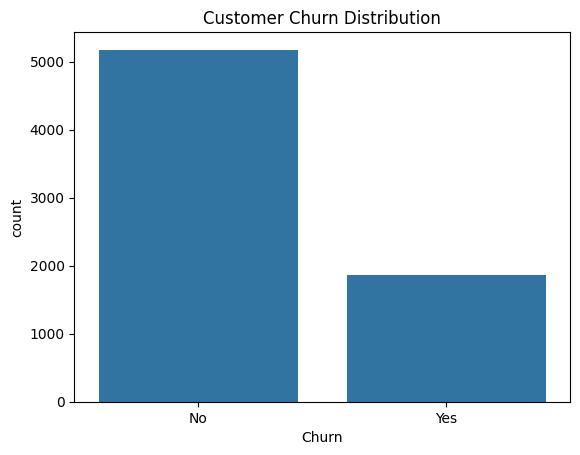

In [449]:
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()


## CLeaning the DataSet

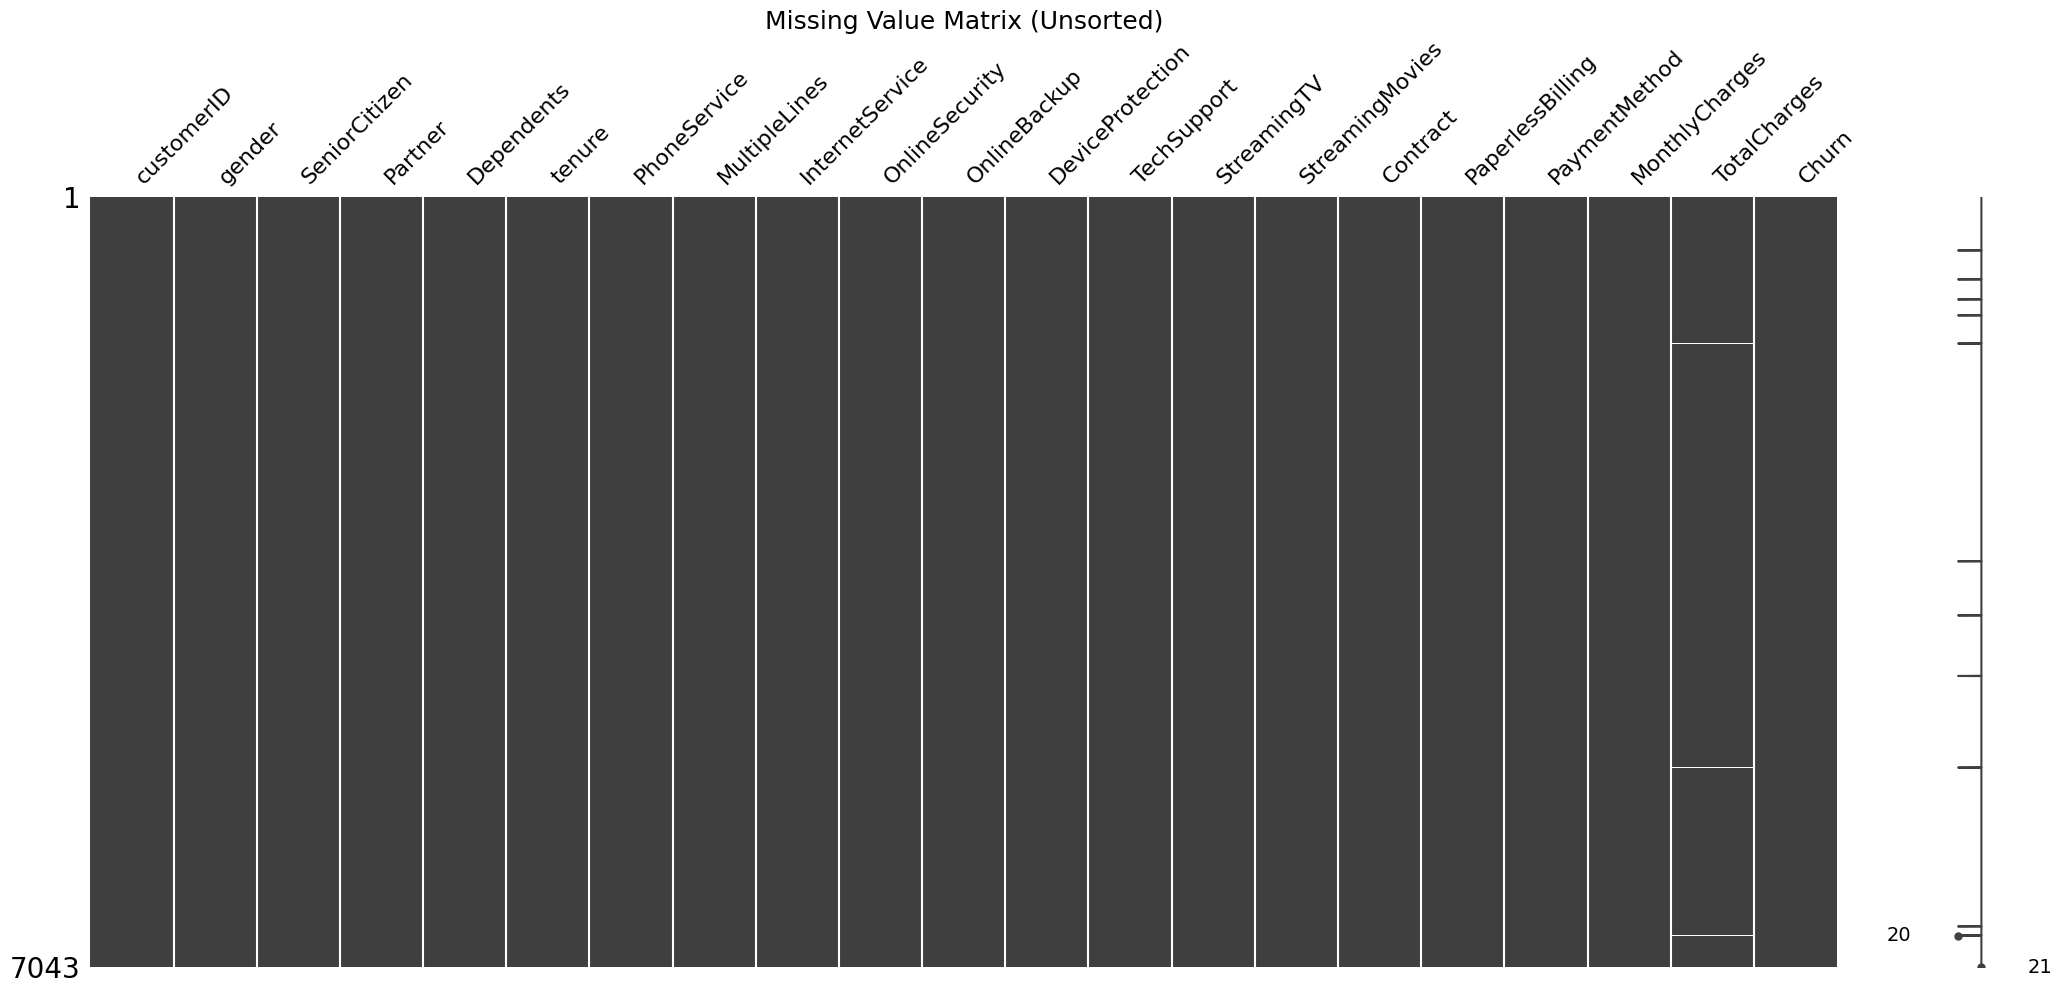

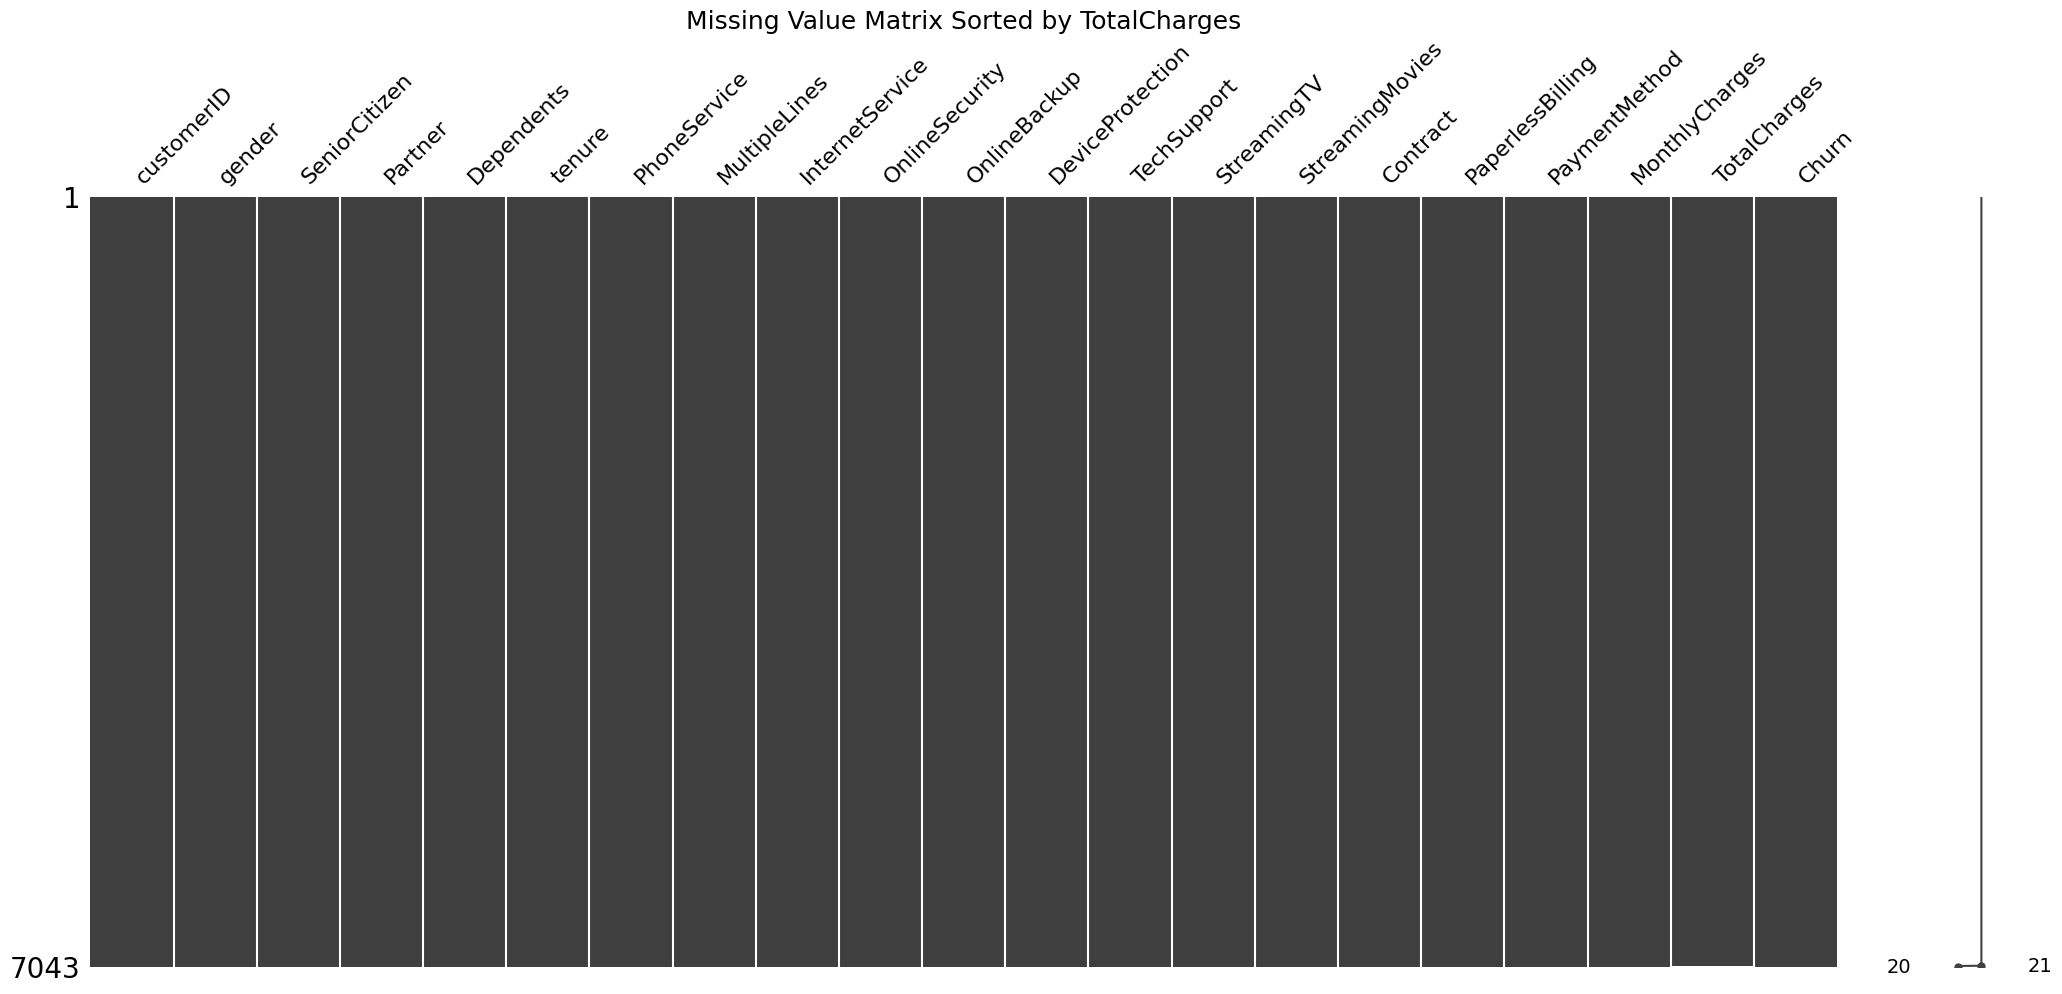

In [450]:
# Enable inline plotting in Jupyter notebooks
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
%matplotlib inline

# External package for missing data visualization
import missingno as mn

# Visualize missing values in the original dataset
mn.matrix(df)
plt.title("Missing Value Matrix (Unsorted)", fontsize=18)
plt.show()

# Visualize missing values sorted by TotalCharges
mn.matrix(df.sort_values(by="TotalCharges"))
plt.title("Missing Value Matrix Sorted by TotalCharges", fontsize=18)
plt.show()

This visualization confirms that missingness is isolated to TotalCharges and does not follow a complex missingness pattern.

In [451]:
# let's clean the dataset a little before moving on

# 1. Remove attributes that just arent useful for us
#    could also have used df.drop(names of columns, inplace=True)
for col in ['CustomerID','PaperlessBilling','PaymentMethod','Dependents','Partner']:
    if col in df:
        del df[col]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7043 non-null   object 


## Imputation Techniques

Split-Impute-Combine in Pandas

In [452]:
# First, ensure TotalCharges is numeric (convert blank spaces to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Group by meaningful business variables
# We group by Contract and SeniorCitizen (you may also include tenure groups if desired)
df_grouped = df.groupby(by=['Contract', 'SeniorCitizen'])

# Define function to fill missing values within each group using the group mean
func = lambda grp: grp.fillna(grp.mean())

# Select numeric columns only
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply grouped imputation and transform back to original structure
df_imputed = df_grouped[numeric_columns].transform(func)

# Recover non-numeric columns that were not transformed
col_deleted = list(set(df.columns) - set(df_imputed.columns))
df_imputed[col_deleted] = df[col_deleted]

# Drop any rows that still contain missing values (if any remain)
df_imputed.dropna(inplace=True)

# Optional: Rearrange columns (example order)
df_imputed = df_imputed[['gender','SeniorCitizen',
                         'tenure','PhoneService','MultipleLines',
                         'InternetService','OnlineSecurity','OnlineBackup',
                         'DeviceProtection','TechSupport','StreamingTV',
                         'StreamingMovies','Contract','MonthlyCharges','TotalCharges','Churn']]

df_imputed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   object 
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [453]:
df.iloc[488]

,488
customerID,4472-LVYGI
gender,Female
SeniorCitizen,0
tenure,0
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,Yes
OnlineBackup,No
DeviceProtection,Yes


In [454]:
# Compute the mean
mean_total_charges = df["TotalCharges"].mean()

# Fill missing values with the mean
df["TotalCharges"].fillna(mean_total_charges, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7043 non-null   float64
 16  Churn             7043 non-null   object 


/tmp/ipython-input-697430015.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(mean_total_charges, inplace=True)


In [455]:
"""
# We forced non-numeric values (blank spaces) to become NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# we confirm that the missing values now numeric values with
df["TotalCharges"].isna().sum()

# Compute the mode
mode_total_charges = df["TotalCharges"].mode()[0]

# Fill missing values with the mean
df["TotalCharges"].fillna(mode_total_charges, inplace=True)


df.info()
"""

'\n# We forced non-numeric values (blank spaces) to become NaN\ndf["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")\n\n# we confirm that the missing values now numeric values with\ndf["TotalCharges"].isna().sum()\n\n# Compute the mode\nmode_total_charges = df["TotalCharges"].mode()[0]\n\n# Fill missing values with the mean\ndf["TotalCharges"].fillna(mode_total_charges, inplace=True)\n\n\ndf.info()\n'

In [456]:
"""
# We forced non-numeric values (blank spaces) to become NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# we confirm that the missing values now numeric values with
df["TotalCharges"].isna().sum()

# Compute the median
median_total_charges = df["TotalCharges"].median()

# Fill missing values with the mean
df["TotalCharges"].fillna(median_total_charges, inplace=True)


df.info()
"""

'\n# We forced non-numeric values (blank spaces) to become NaN\ndf["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")\n\n# we confirm that the missing values now numeric values with\ndf["TotalCharges"].isna().sum()\n\n# Compute the median\nmedian_total_charges = df["TotalCharges"].median()\n\n# Fill missing values with the mean\ndf["TotalCharges"].fillna(median_total_charges, inplace=True)\n\n\ndf.info()\n'

In [457]:
df.iloc[488]

,488
customerID,4472-LVYGI
gender,Female
SeniorCitizen,0
tenure,0
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,Yes
OnlineBackup,No
DeviceProtection,Yes


## DATA VISUALIZATION

## (1) Churn Distribution (Categorical)
Insight:
Class imbalance exists (~27% churn). Accuracy alone would be misleading.

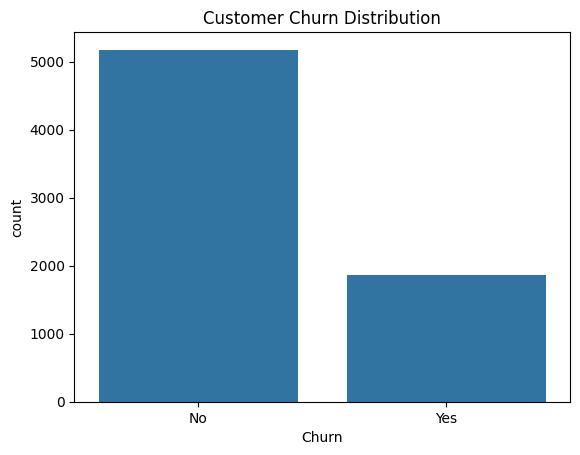

In [458]:
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()


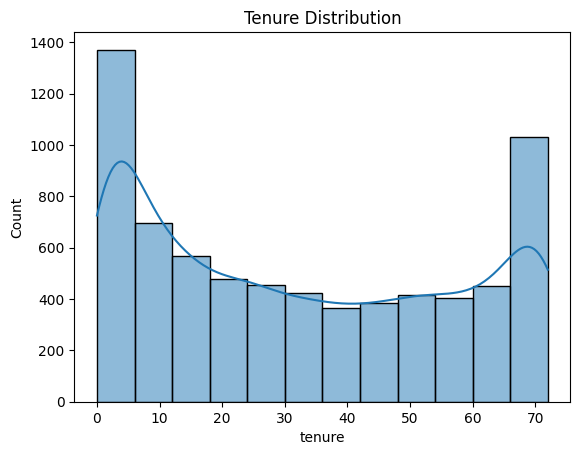

In [459]:
sns.histplot(df['tenure'], bins=12, kde=True)
plt.title("Tenure Distribution")
plt.show()


## Tenure Distribution
Insight:
Large spike at low tenure → early churn is common.

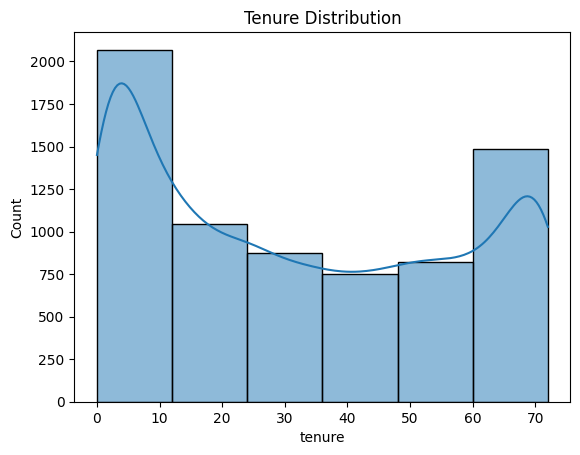

In [460]:
sns.histplot(df['tenure'], bins=6, kde=True)
plt.title("Tenure Distribution")
plt.show()


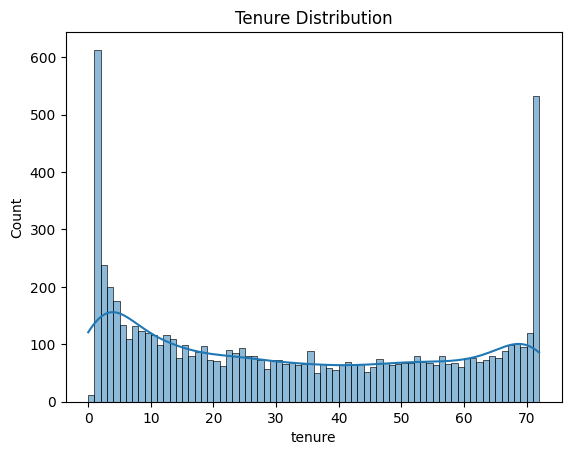

In [461]:
sns.histplot(df['tenure'], bins=72, kde=True)
plt.title("Tenure Distribution")
plt.show()


## (3) Monthly Charges by Churn
Insight:
Customers who churn tend to have higher monthly charges.

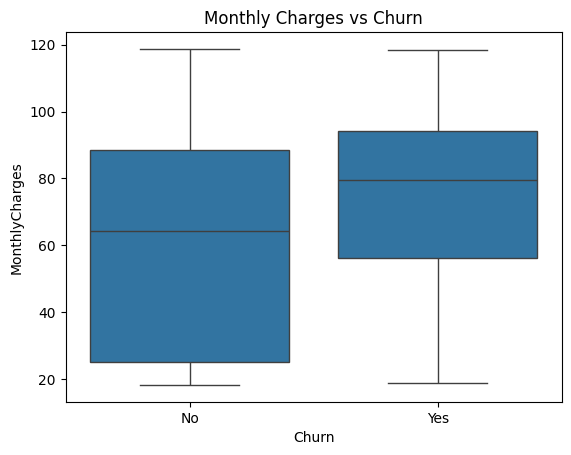

In [462]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


## (4) Contract Type Distribution
Insight:
Month-to-month contracts have substantially higher churn rates.

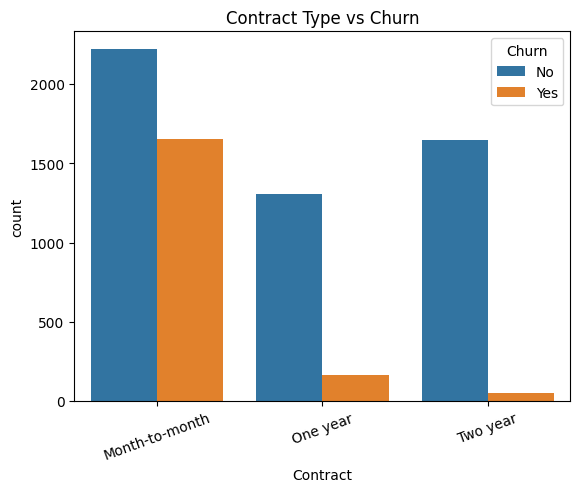

In [463]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=20)
plt.title("Contract Type vs Churn")
plt.show()


## (5) Total Charges Density

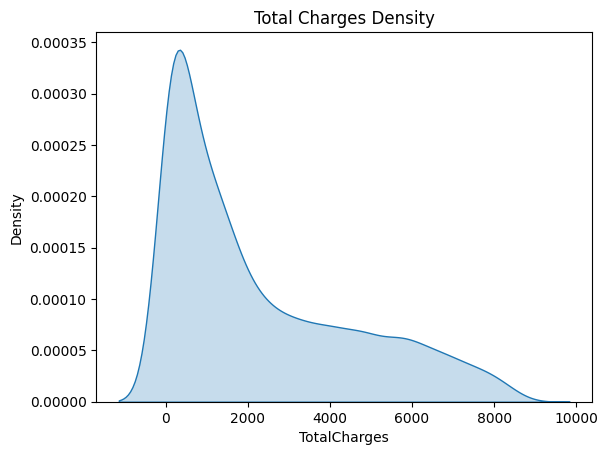

In [464]:
sns.kdeplot(df['TotalCharges'], fill=True)
plt.title("Total Charges Density")
plt.show()


## Spearman Heatmap
## Correlation with the Target (Churn)

Looking at the last row/column (Churn):

Strong negative correlation with tenure (~ -0.35)

Longer-tenure customers are less likely to churn

Early months are critical for retention; this matches business intuition

Moderate positive correlation with MonthlyCharges (~ +0.19)

Customers with higher monthly charges are slightly more likely to churn

Suggests price sensitivity influences churn behavior

Weak or negative correlations with some service-related features

TechSupport, DeviceProtection, OnlineSecurity show slight negative correlations (~ -0.1 to -0.15)

Customers with these services are less likely to churn, indicating added value reduces churn

Contract-related correlation

Contract codes (encoded numerically) show a negative correlation with Churn

Month-to-month contracts (low numeric code) → higher churn

Longer-term contracts → lower churn

PaperlessBilling / PaymentMethod

Small positive correlation with Churn, but relatively weak (~ +0.1)

Paperless billing slightly increases churn, possibly reflecting younger or less engaged customers

## Feature-to-Feature Correlations (Insights for Modeling)

TotalCharges and tenure → Strong positive correlation (~ +0.83)

Makes sense: more months with the company → higher total charges

Important for interpreting model coefficients, since these features are not independent

Service bundling correlations:

StreamingTV & StreamingMovies (~ +0.64) → customers who subscribe to one often subscribe to the other

OnlineBackup, DeviceProtection, TechSupport show moderate correlations (~ +0.3–0.4)

This indicates bundled services are common, which could influence churn behavior

Demographics:

SeniorCitizen has a small positive correlation with Churn (~ +0.15)

Gender and Partner/Dependents are weakly correlated, suggesting they are less predictive alone

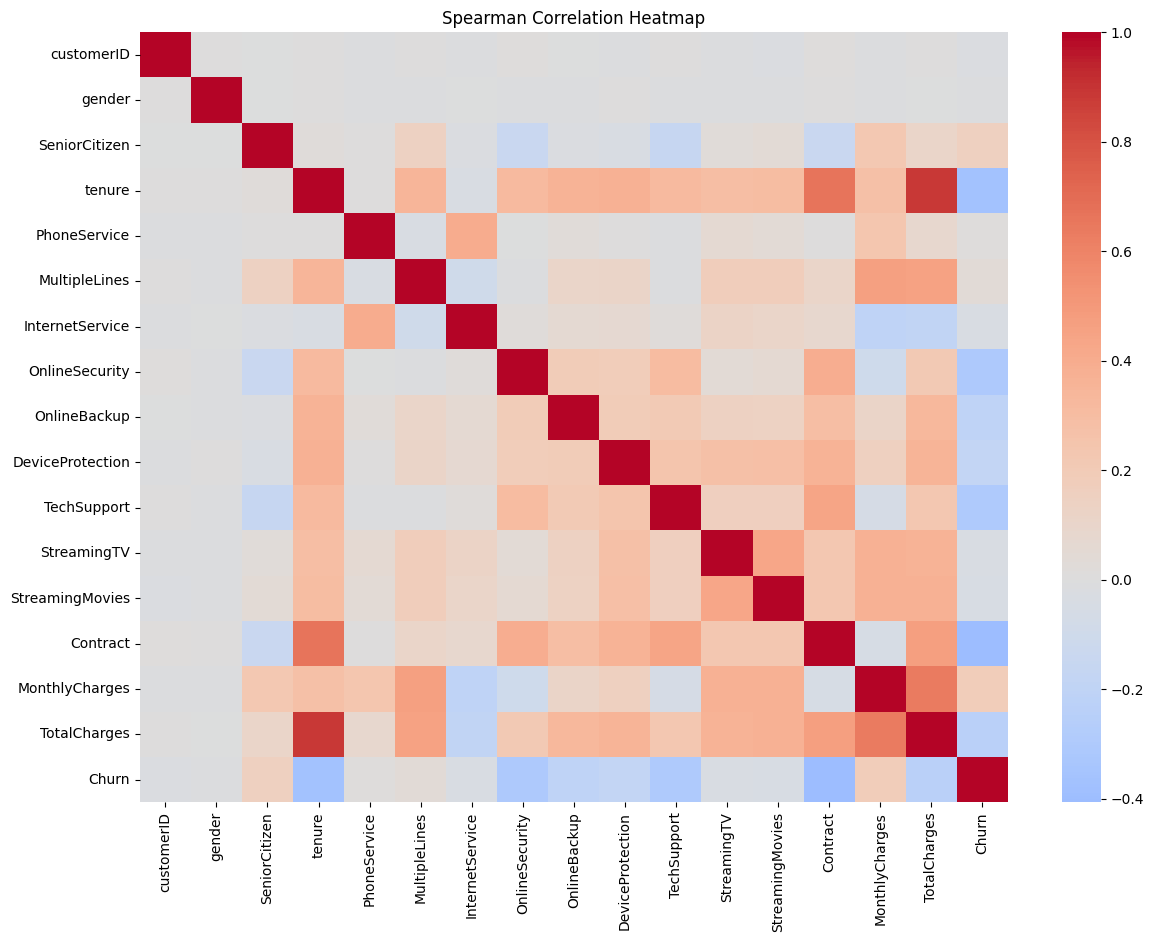

In [465]:
# Encode categorical variables for correlation analysis
from sklearn.preprocessing import LabelEncoder


corr_df = df.copy()
for col in corr_df.select_dtypes(include='object').columns:
    corr_df[col] = LabelEncoder().fit_transform(corr_df[col])


# Compute Spearman correlation
spearman_corr = corr_df.corr(method='spearman')

plt.figure(figsize=(14,10))
sns.heatmap(spearman_corr, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [466]:
data = {
    'Feature': [
        'tenure',
        'Contract',
        'MonthlyCharges',
        'TotalCharges',
        'TechSupport',
        'StreamingServices',
        'SeniorCitizen',
        'Service Bundles (DeviceProtection, OnlineSecurity)'
    ],
    'Correlation with Churn': [
        ' -0.35',
        ' -0.35',
        ' +0.19',
        ' -0.20 (after controlling for tenure)',
        ' -0.12',
        '+0.1 to +0.15',
        ' +0.15',
        '-0.1 to -0.15'
    ],
    'Interpretation': [
        'Longer tenure → less likely to churn',
        'Long-term contracts reduce churn',
        'Higher bills → higher churn risk',
        'Low total charges often correspond to short-term churners',
        'Access to tech support reduces churn slightly',
        'Mixed effect; bundle may attract or retain depending on usage',
        'Slightly higher churn in older customers',
        'Protective services slightly reduce churn'
    ]
}

df2 = pd.DataFrame(data)

# Custom formatted table with borders
col_widths = [45, 35, 55]  # Adjust widths as needed
headers = ['Feature', 'Correlation with Churn', 'Interpretation']

# Top border
border = "+" + "+".join(["-" * (width + 2) for width in col_widths]) + "+"
print(border)

# Header row
header_row = "|"
for i, header in enumerate(headers):
    header_row += f" {header:<{col_widths[i]}} |"
print(header_row)

# Header bottom border
print(border)

# Data rows with spacing
for idx, row in df2.iterrows():
    data_row = "|"
    for i, header in enumerate(headers):
        data_row += f" {str(row[header]):<{col_widths[i]}} |"
    print(data_row)
    print(border)  # Border after each row for spacing

+-----------------------------------------------+-------------------------------------+---------------------------------------------------------+
| Feature                                       | Correlation with Churn              | Interpretation                                          |
+-----------------------------------------------+-------------------------------------+---------------------------------------------------------+
| tenure                                        |  -0.35                              | Longer tenure → less likely to churn                    |
+-----------------------------------------------+-------------------------------------+---------------------------------------------------------+
| Contract                                      |  -0.35                              | Long-term contracts reduce churn                        |
+-----------------------------------------------+-------------------------------------+-------------------------------------

## 3.2 Questions of Interest

-## Q1: Does contract type influence churn risk?

(Already visualized above)

Interpretation:
Long-term contracts dramatically reduce churn → strong actionable insight.

## Q2: Are customers with higher charges more likely to churn?
Interpretation:
Higher pricing increases churn probability → pricing sensitivity.

In [467]:
"""
df.columns = df.columns.str.strip()

sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges Distribution by Churn")
plt.show()
"""

'\ndf.columns = df.columns.str.strip()\n\nsns.violinplot(x=\'Churn\', y=\'MonthlyCharges\', data=df)\nplt.title("Monthly Charges Distribution by Churn")\nplt.show()\n'

## Q3: How does tenure interact with churn?
Interpretation:
Customers who stay longer are far less likely to churn.

In [468]:
"""
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()
"""

'\nsns.boxplot(x=\'Churn\', y=\'tenure\', data=df)\nplt.title("Tenure vs Churn")\nplt.show()\n'

## What percentage of customers churned?

In [469]:
# Since we are interested in the customers that churn or not which is a category data (yes or no)
# we had to convert to numeric data)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

churn_rate = sum(df['Churn'] == 1) / len(df) * 100
print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 26.54%


## What percentage of people churn from the different contract

In [470]:
# Group by Contract type
df_grouped = df.groupby(by='Contract')

for val, grp in df_grouped:
    total_customers = len(grp)
    churned = grp['Churn'].sum()
    churn_rate = grp['Churn'].mean() * 100

    print(f"There were {total_customers} customers on {val} contracts.")
    print(f"{churned} customers churned.")
    print(f"Churn rate: {churn_rate:.2f}%\n")


There were 3875 customers on Month-to-month contracts.
1655 customers churned.
Churn rate: 42.71%

There were 1473 customers on One year contracts.
166 customers churned.
Churn rate: 11.27%

There were 1695 customers on Two year contracts.
48 customers churned.
Churn rate: 2.83%



## What are the percentage of male and female that churn

In [471]:
df_grouped = df.groupby(by='gender')

for val, grp in df_grouped:
    total_customers = len(grp)
    churned = grp['Churn'].sum()
    churn_rate = grp['Churn'].mean() * 100

    print(f"There were {total_customers} {val} customers.")
    print(f"{churned} customers churned.")
    print(f"Churn rate: {churn_rate:.2f}%\n")


There were 3488 Female customers.
939 customers churned.
Churn rate: 26.92%

There were 3555 Male customers.
930 customers churned.
Churn rate: 26.16%



## What is the absolute average difference (AAD) of those who churn in different contract

In [472]:
# Create code for calculating the absolute average difference
#   for survival in each group, df_grouped.Survived

df_grouped = df.groupby(by='Contract')

for val, grp in df_grouped:
    aad = np.mean(np.abs(grp['Churn'] - grp['Churn'].mean()))
    print(f"The AAD of churn for {val} contracts is {aad:.4f}.")


The AAD of churn for Month-to-month contracts is 0.4894.
The AAD of churn for One year contracts is 0.2000.
The AAD of churn for Two year contracts is 0.0550.


## Month-to-Month (0.4894)
This is very high. This means that Churn is highly variable in this group. Many customers churn. The churn rate is likely close to 50%.
This suggests Month-to-month customers are unstable.
They are much more likely to leave.
This is expected in telecom data.

## One-Year Contract (0.2000)
Moderate variation. This suggests fewer customers churn compared to month-to-month.
Some churn still occurs, but at a much lower rate.

## Two-Year Contract (0.0550)
Very low variation. This means that very few customers churn. Most customers stay.
This indicates that Two-year contracts strongly reduce churn risk.

## What are the Percentage of Senior Citizens that churn in different contract type

In [473]:
# Filter senior citizens
senior_df = df[df['SeniorCitizen'] == 1]

# Group by contract type and compute churn rate
churn_rate = senior_df.groupby('Contract')['Churn'].mean() * 100

print(churn_rate)


Contract
Month-to-month    54.646840
One year          15.263158
Two year           4.137931
Name: Churn, dtype: float64


From our result, we see that most senior citizens churn on month-to-month basis. This could be that some of them died along the process

In [474]:
# Calculate percentage of senior citizens
senior_percentage = df['SeniorCitizen'].mean() * 100

print(f"Percentage of senior citizens in the dataset: {senior_percentage:.2f}%")


Percentage of senior citizens in the dataset: 16.21%


In [475]:
senior_count = df['SeniorCitizen'].sum()
total_customers = len(df)

senior_percentage = (senior_count / total_customers) * 100

print(f"Senior Citizens: {senior_count}")
print(f"Total Customers: {total_customers}")
print(f"Percentage: {senior_percentage:.2f}%")


Senior Citizens: 1142
Total Customers: 7043
Percentage: 16.21%
